分别设计一个高斯低通、高通、高频提升、以及陷波滤波器，显示这些滤波器的二维强度图像，同时
显示这些滤波器的三维曲面图

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义绘制二维强度图像和三维曲面图的函数
def plot_filter_2d_3d(filter, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # 2D 强度图
    ax1.imshow(filter, cmap='gray')
    ax1.set_title(f"{title} - 2D Intensity")
    ax1.axis('off')

    # 3D 曲面图
    X = np.arange(filter.shape[0])
    Y = np.arange(filter.shape[1])
    X, Y = np.meshgrid(X, Y)
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(X, Y, filter, cmap='viridis')
    ax2.set_title(f"{title} - 3D Surface")
    plt.tight_layout()
    plt.show()


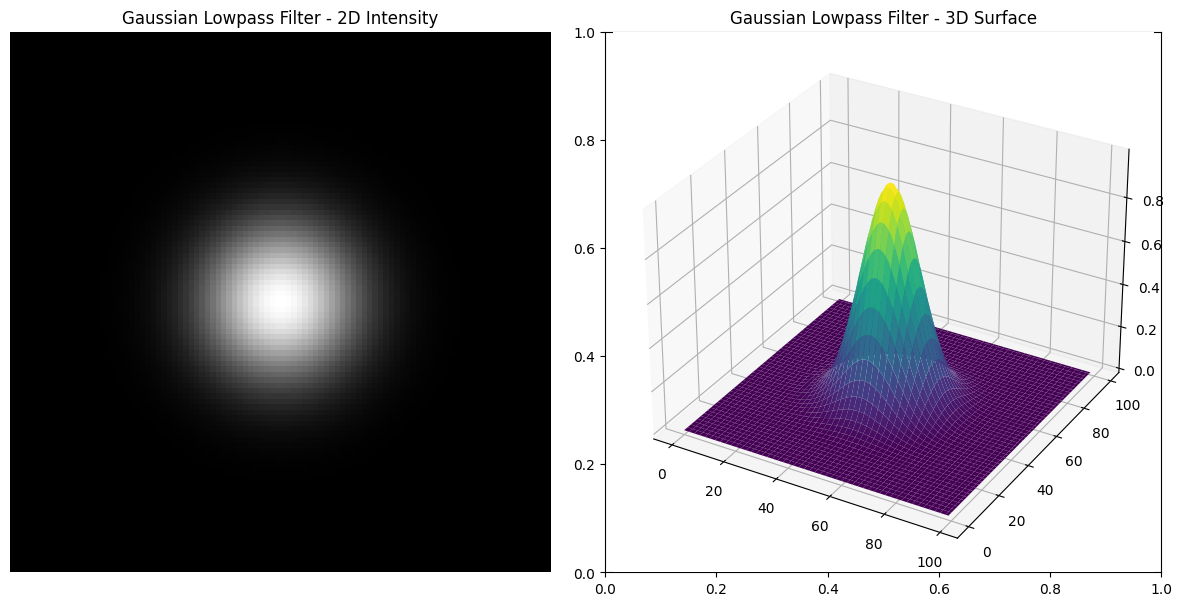

In [7]:
def gaussian_lowpass(size, cutoff):
    x = np.linspace(-0.5, 0.5, size)
    y = np.linspace(-0.5, 0.5, size)
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    H = np.exp(-(D**2) / (2 * (cutoff**2)))
    return H

size = 100
cutoff = 0.1
gaussian_lp = gaussian_lowpass(size, cutoff)
plot_filter_2d_3d(gaussian_lp, "Gaussian Lowpass Filter")


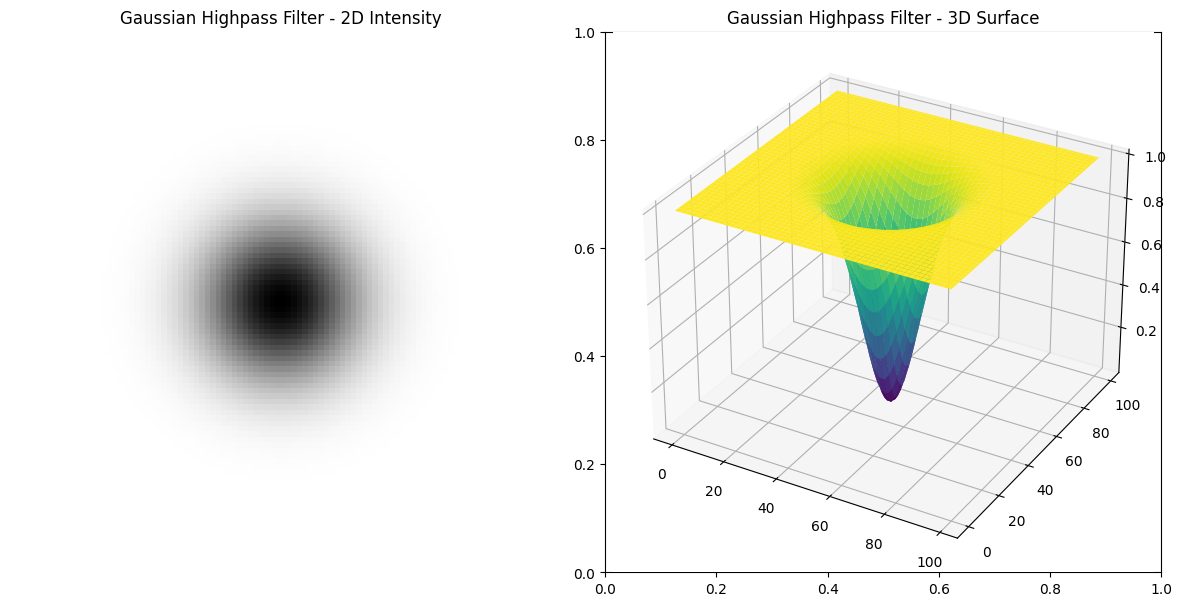

In [8]:
def gaussian_highpass(size, cutoff):
    lp = gaussian_lowpass(size, cutoff)
    return 1 - lp

gaussian_hp = gaussian_highpass(size, cutoff)
plot_filter_2d_3d(gaussian_hp, "Gaussian Highpass Filter")


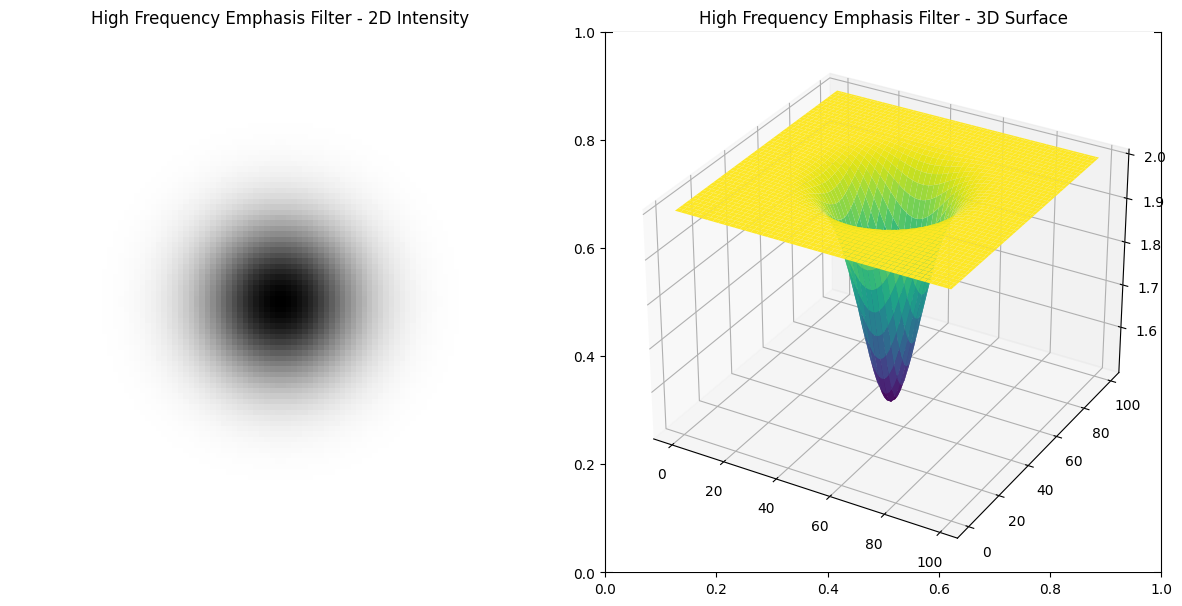

In [9]:
def high_frequency_emphasis(size, cutoff, boost_factor=1.5, highpass_factor=0.5):
    hp = gaussian_highpass(size, cutoff)
    return boost_factor + highpass_factor * hp

high_freq_emph = high_frequency_emphasis(size, cutoff)
plot_filter_2d_3d(high_freq_emph, "High Frequency Emphasis Filter")


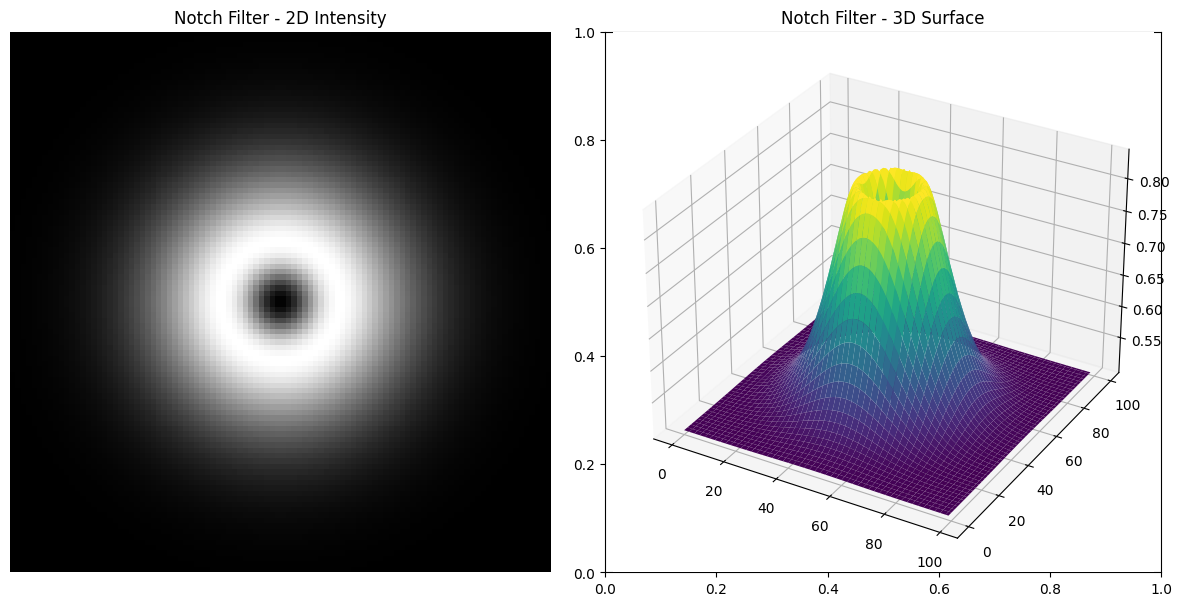

In [10]:
def notch_filter(size, low_cutoff, high_cutoff):
    lp = gaussian_lowpass(size, low_cutoff)
    hp = gaussian_highpass(size, high_cutoff)
    return 1 - (lp + hp) / 2

low_cutoff = 0.05
high_cutoff = 0.15
notch = notch_filter(size, low_cutoff, high_cutoff)
plot_filter_2d_3d(notch, "Notch Filter")
